In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [34]:
cols =["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0  216.0021    8.7967  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [35]:
df["class"]=(df["class"]=="g").astype(int)

In [36]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0  216.0021    8.7967  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

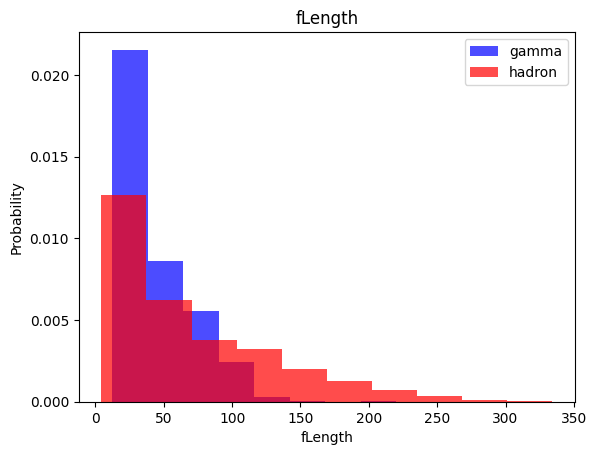

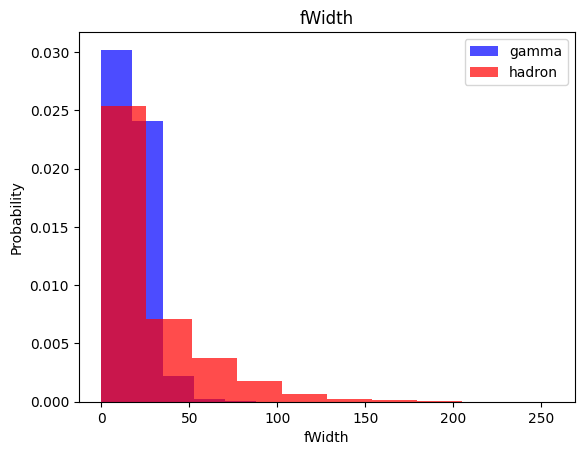

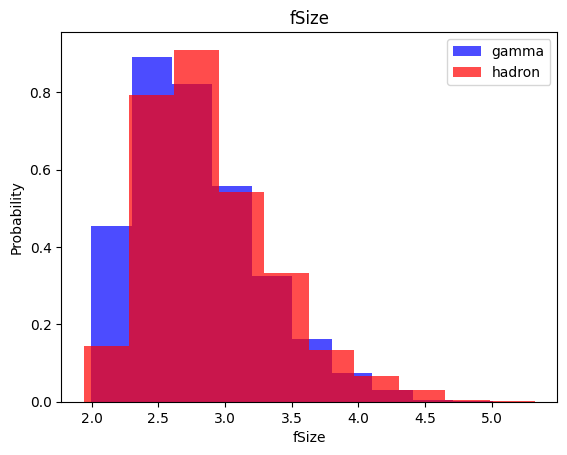

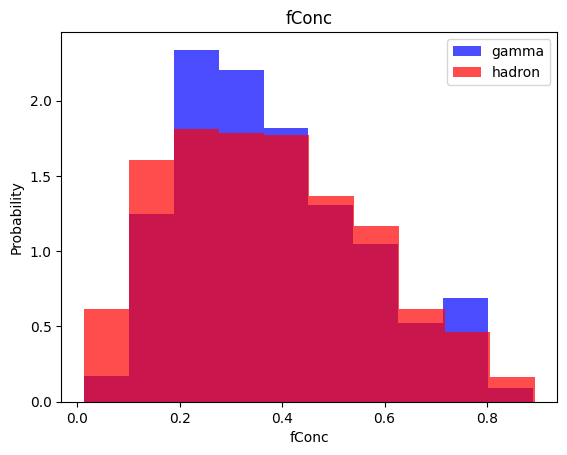

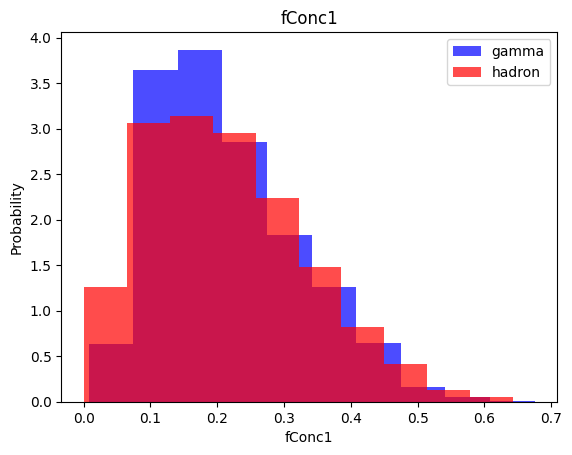

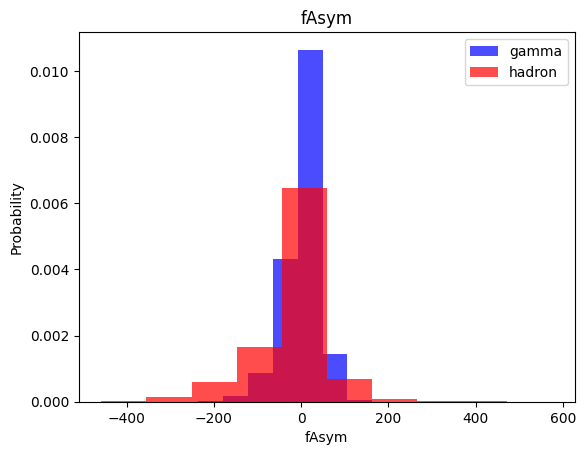

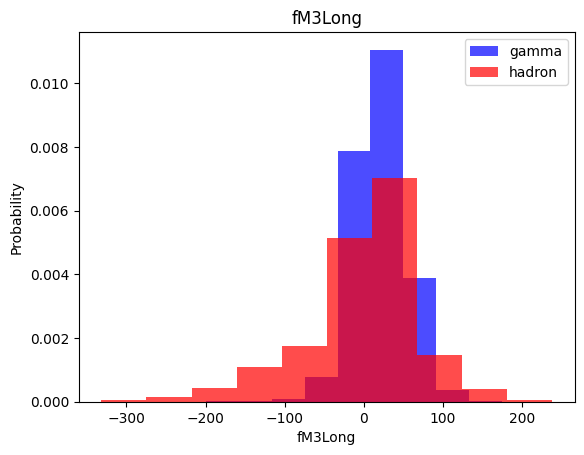

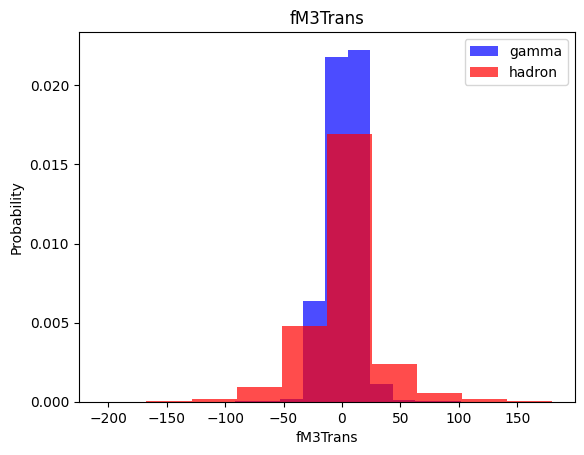

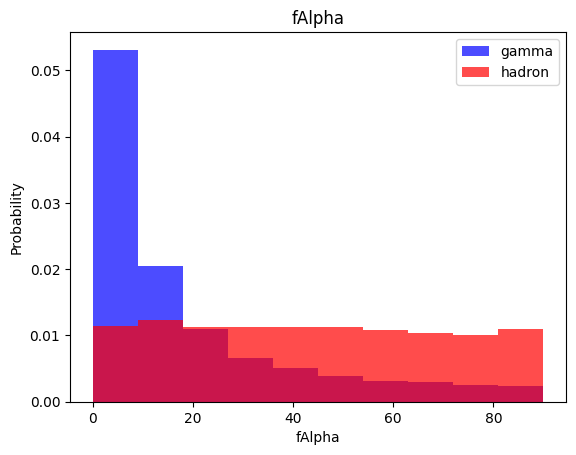

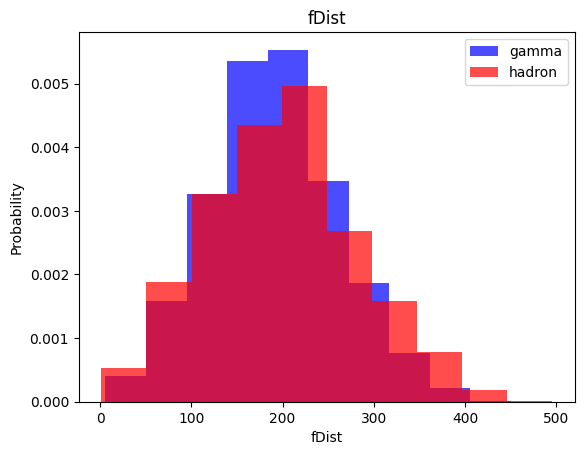

In [37]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label], color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Train,validation,Test

In [38]:
print(len(df["class"]==1)) # gamma
print(len(df["class"]==0))

19020
19020


These values where 7419 and 3993 respectively so we oversampled them

In [39]:
train, valid, test = np.split(df.sample(frac=1).values, [int(0.6*len(df)), int(0.8*len(df))])

In [40]:
def scale_dataset(data_array, oversample=False):
  X = data_array[:,:-1]
  y = data_array[:,-1]

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [41]:
train_data, X_train, y_train = scale_dataset(train, oversample=True) 
valid_data, X_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, X_test, y_test = scale_dataset(test, oversample=False)

# kNN (k-nearest Neighbours)

This model works on shortest distance from a point.<br>
Used for Supervidsed learning(Classification & Regression)<br>
1. Choose k(no. of nearest neighbour to check) <br>
2. Calculate Distance(Euclidean Diatance)<br>
3. Find Neighbour sort them<br>
4. Vote and assigned <br>

Small K - High sensitivity to noise --> Overfitting<br>
Large K - Smooth decision --> Underfitting<br>

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      1353
         1.0       0.85      0.87      0.86      2451

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [47]:
y_pred = nb_model.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.39      0.50      1353
         1.0       0.73      0.90      0.80      2451

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



# Log Regression

It is a supervised Learning<br>
Uses Sigmoid function and gives output in probability between 0 to 1<br>
Works well with linear data<br>
Used for - 
1. Spam detection
2. Disease prediction 

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [51]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71      1353
         1.0       0.85      0.83      0.84      2451

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM (Supprot Vector Machine)

It is a supervised learning<br>
Used for classififcation and regression <br>
Finds an optimal seperating hyperplane between two state / data<br>
Maximaize the margin between the classes i.e Output<br>
Types of SVM -
1. Linear SVM
2. Non-linear SVM
Used for -
1. Text classification
2. Face recognition
3. Bioinformatics
4. Spam detection

In [52]:
from sklearn.svm import SVC

In [53]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [54]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1353
         1.0       0.88      0.91      0.90      2451

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [55]:
import tensorflow as tf

In [56]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'],label='')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

1. validation_split = 0.2<br>
splits 20% of training data for validation  <br>
2. lr = learning rate<br>
3. Dropout(dropout_prob)<br>
drop the random nodes of NN, so that the model dont memorize the pattern instead learn from data

In [57]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])
    
    history = nn_model.fit(
        X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )

    return nn_model,history

### 'inf' is positive infinity
### evalute() function
It uses the X_valid & y_valid to find the accuracy and loss<br>
"model.evaluate(X_valid,y_valid)[0]" here '0' stands for loss<br>
"model.evaluate(X_valid,y_valid)[1] here '1' stands for accuracy



16 nodes , dropout 0 , learning rate 0.01 , batch size 32


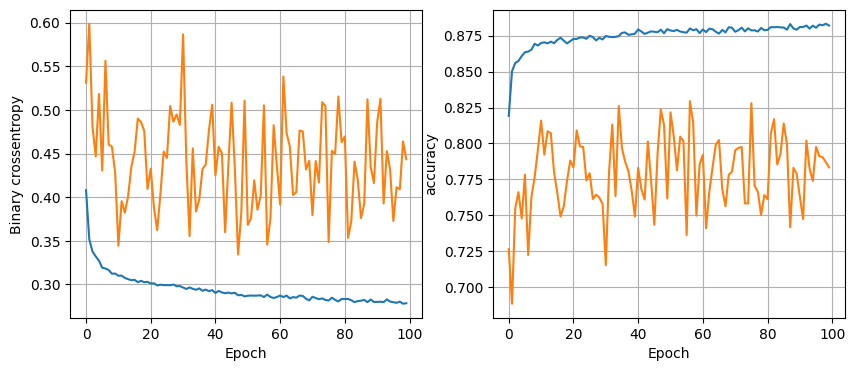

119/119 [==============================] - 0s 577us/step - loss: 0.3288 - accuracy: 0.8704
16 nodes , dropout 0 , learning rate 0.01 , batch size 64


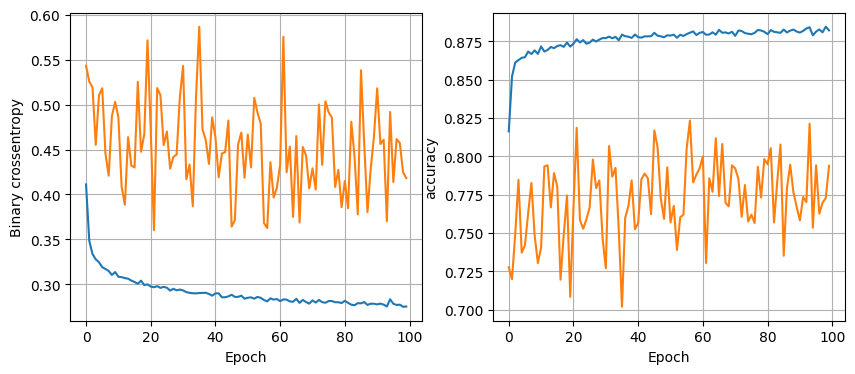

119/119 [==============================] - 0s 566us/step - loss: 0.3244 - accuracy: 0.8707
16 nodes , dropout 0 , learning rate 0.01 , batch size 128


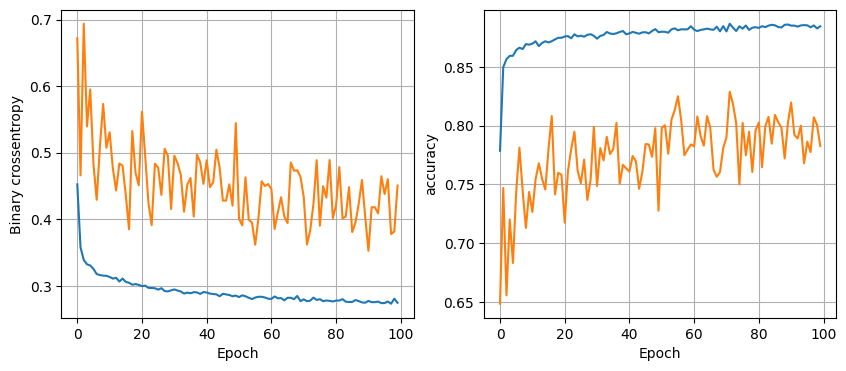

119/119 [==============================] - 0s 579us/step - loss: 0.3334 - accuracy: 0.8683
16 nodes , dropout 0 , learning rate 0.005 , batch size 32


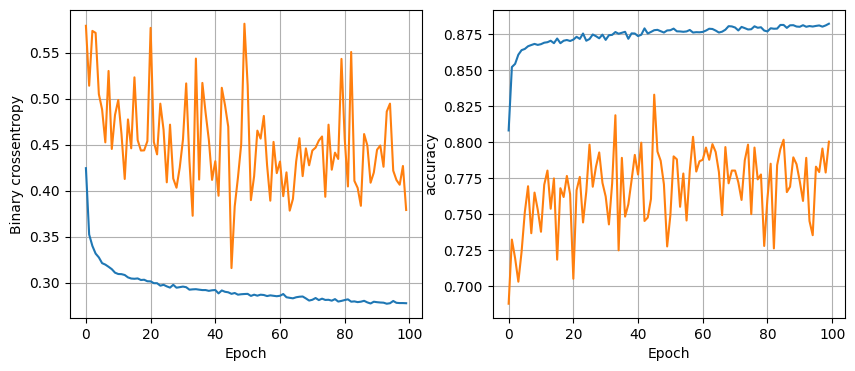

119/119 [==============================] - 0s 590us/step - loss: 0.3372 - accuracy: 0.8633
16 nodes , dropout 0 , learning rate 0.005 , batch size 64


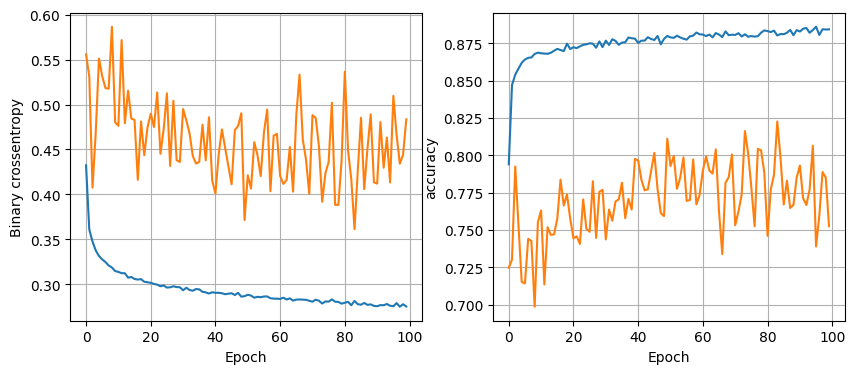

119/119 [==============================] - 0s 563us/step - loss: 0.3313 - accuracy: 0.8688
16 nodes , dropout 0 , learning rate 0.005 , batch size 128


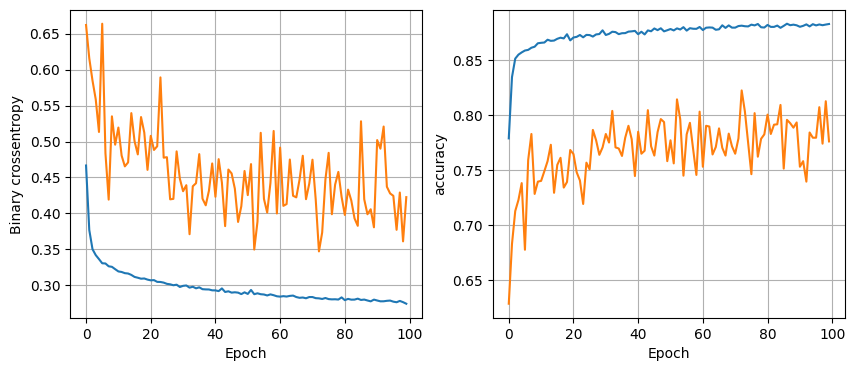

119/119 [==============================] - 0s 581us/step - loss: 0.3231 - accuracy: 0.8699
16 nodes , dropout 0 , learning rate 0.001 , batch size 32


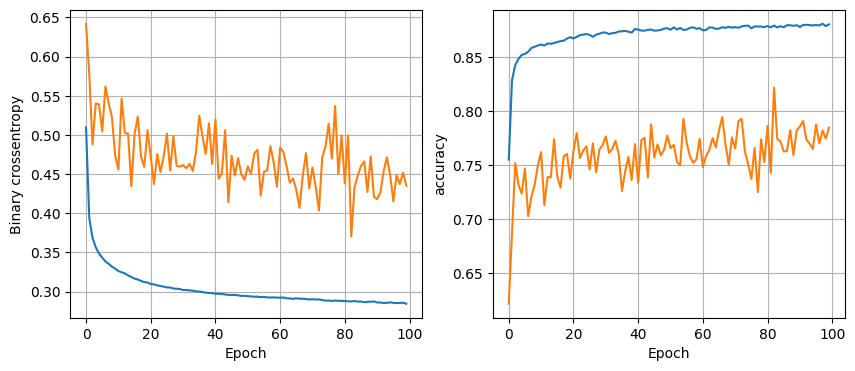

119/119 [==============================] - 0s 573us/step - loss: 0.3154 - accuracy: 0.8738
16 nodes , dropout 0 , learning rate 0.001 , batch size 64


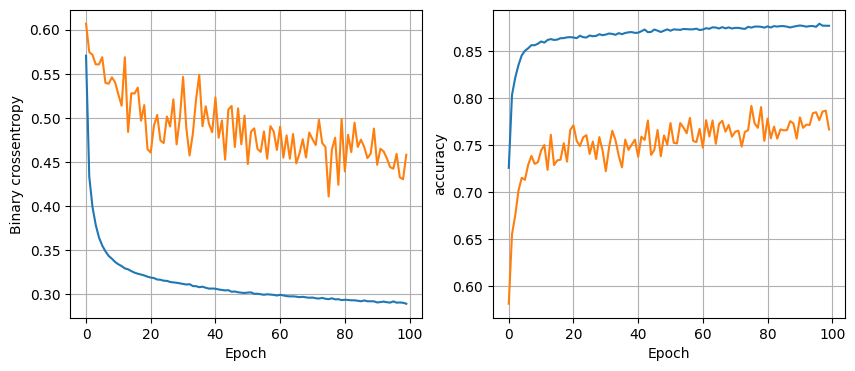

119/119 [==============================] - 0s 577us/step - loss: 0.3222 - accuracy: 0.8665
16 nodes , dropout 0 , learning rate 0.001 , batch size 128


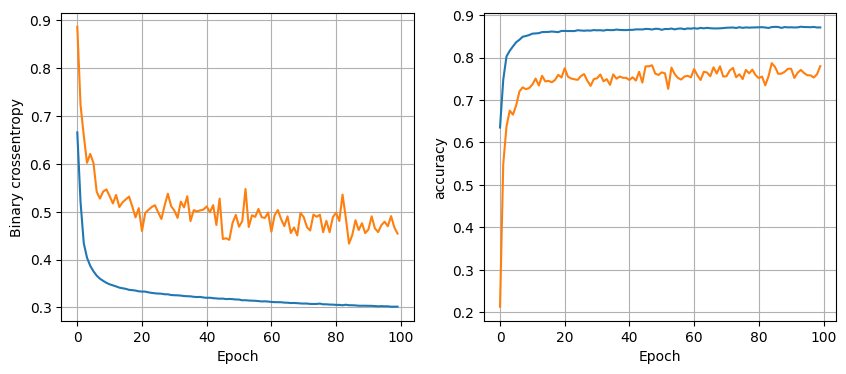

119/119 [==============================] - 0s 562us/step - loss: 0.3223 - accuracy: 0.8691
16 nodes , dropout 0.2 , learning rate 0.01 , batch size 32


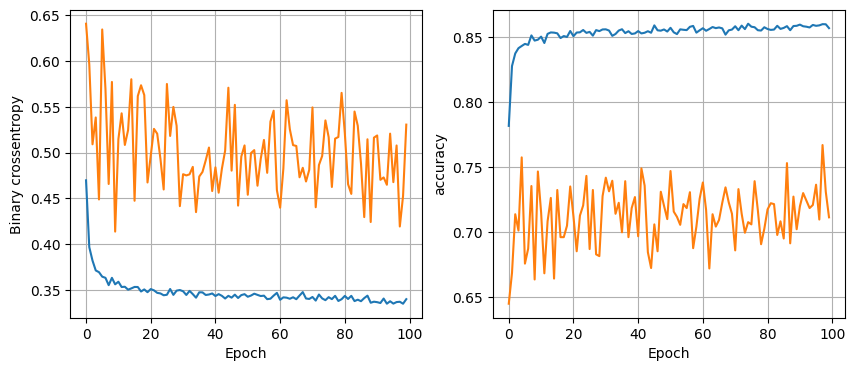

119/119 [==============================] - 0s 564us/step - loss: 0.3209 - accuracy: 0.8670
16 nodes , dropout 0.2 , learning rate 0.01 , batch size 64


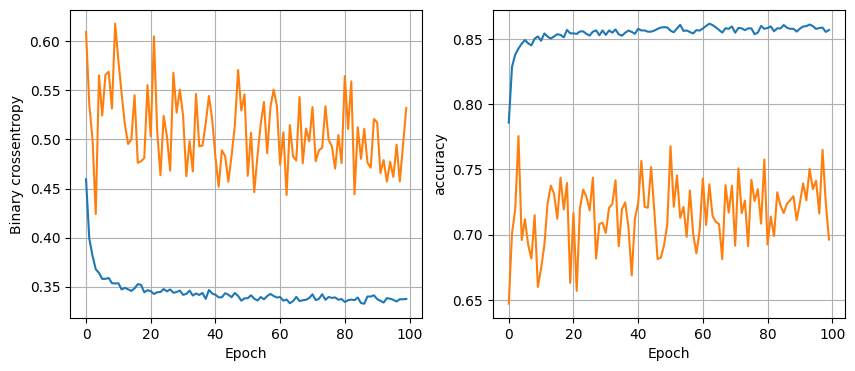

119/119 [==============================] - 0s 567us/step - loss: 0.3184 - accuracy: 0.8662
16 nodes , dropout 0.2 , learning rate 0.01 , batch size 128


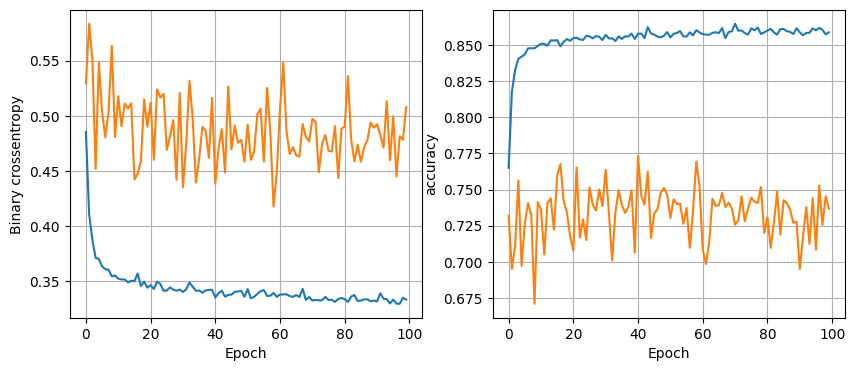

119/119 [==============================] - 0s 478us/step - loss: 0.3135 - accuracy: 0.8722
16 nodes , dropout 0.2 , learning rate 0.005 , batch size 32


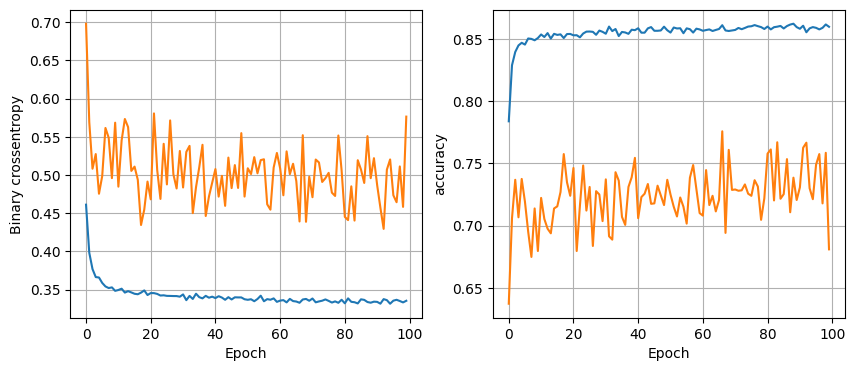

119/119 [==============================] - 0s 462us/step - loss: 0.3263 - accuracy: 0.8662
16 nodes , dropout 0.2 , learning rate 0.005 , batch size 64


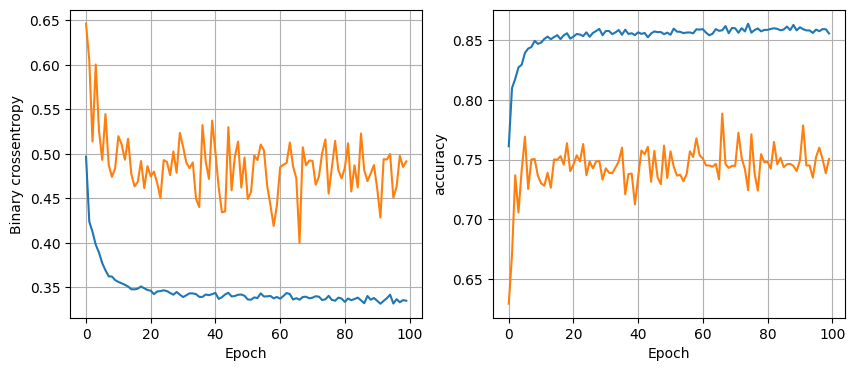

119/119 [==============================] - 0s 579us/step - loss: 0.3200 - accuracy: 0.8680
16 nodes , dropout 0.2 , learning rate 0.005 , batch size 128


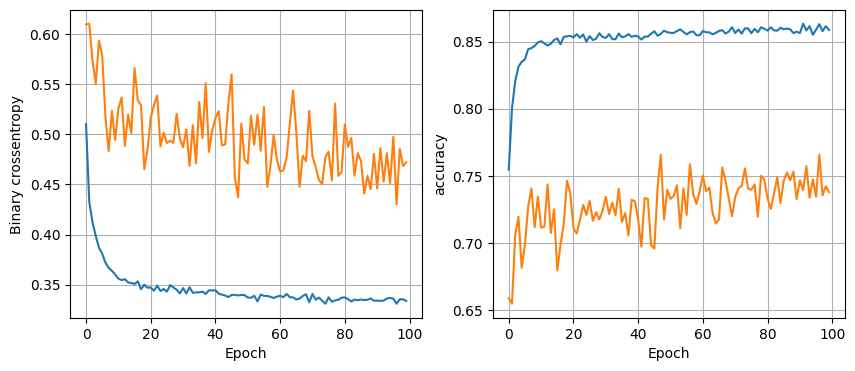

119/119 [==============================] - 0s 682us/step - loss: 0.3195 - accuracy: 0.8725
16 nodes , dropout 0.2 , learning rate 0.001 , batch size 32


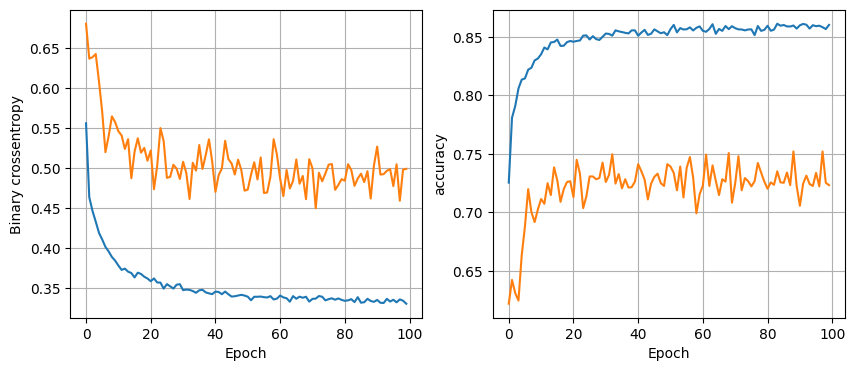

119/119 [==============================] - 0s 485us/step - loss: 0.3197 - accuracy: 0.8649
16 nodes , dropout 0.2 , learning rate 0.001 , batch size 64


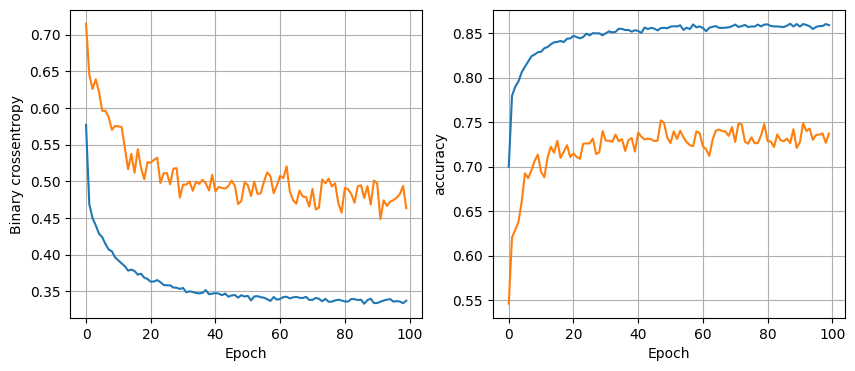

119/119 [==============================] - 0s 591us/step - loss: 0.3206 - accuracy: 0.8709
16 nodes , dropout 0.2 , learning rate 0.001 , batch size 128


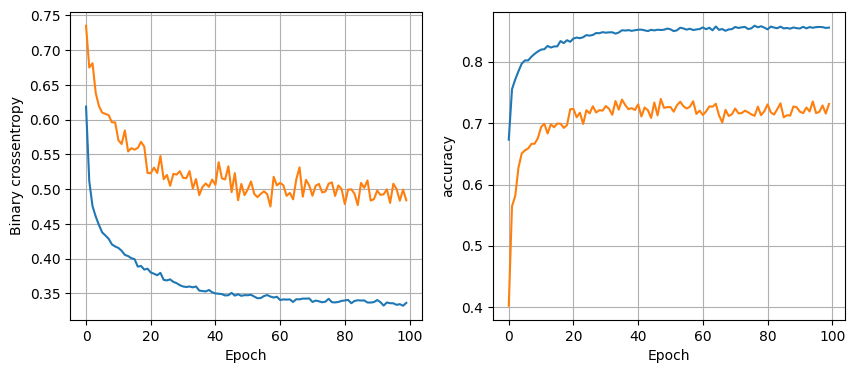

119/119 [==============================] - 0s 593us/step - loss: 0.3218 - accuracy: 0.8654
32 nodes , dropout 0 , learning rate 0.01 , batch size 32


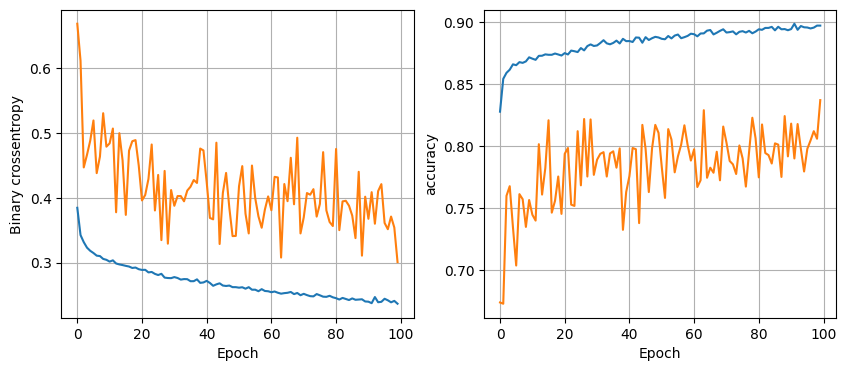

119/119 [==============================] - 0s 524us/step - loss: 0.4096 - accuracy: 0.8636
32 nodes , dropout 0 , learning rate 0.01 , batch size 64


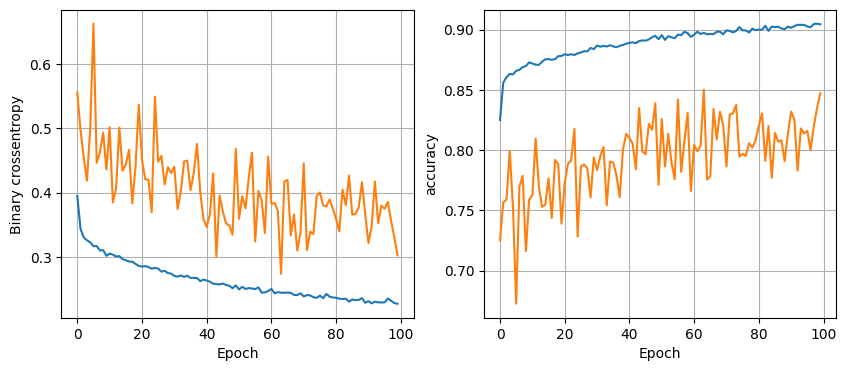

119/119 [==============================] - 0s 635us/step - loss: 0.4022 - accuracy: 0.8594
32 nodes , dropout 0 , learning rate 0.01 , batch size 128


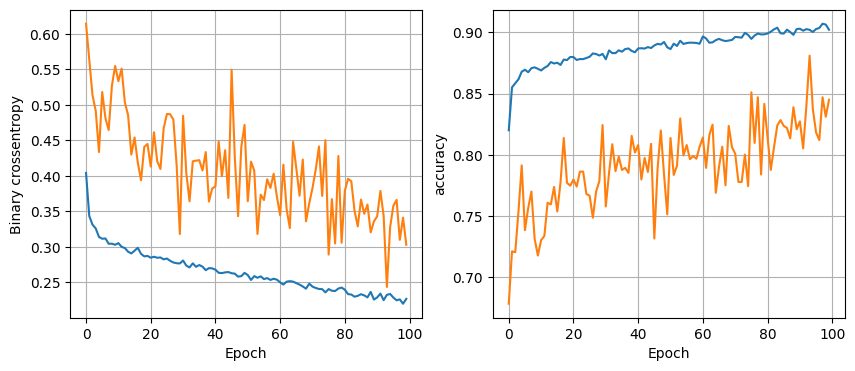

119/119 [==============================] - 0s 604us/step - loss: 0.3965 - accuracy: 0.8557
32 nodes , dropout 0 , learning rate 0.005 , batch size 32


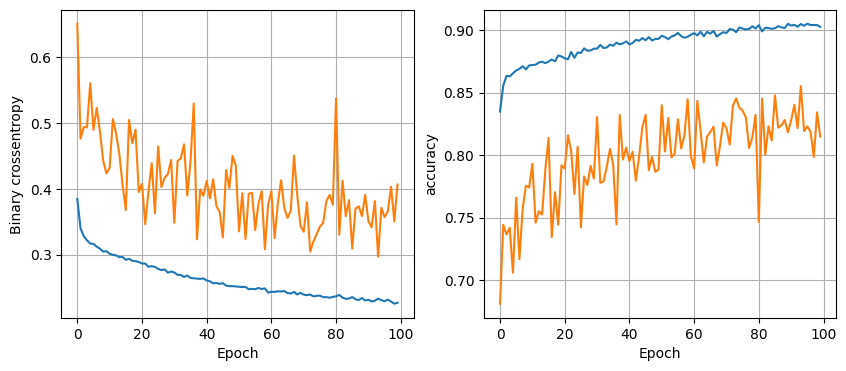

119/119 [==============================] - 0s 453us/step - loss: 0.3818 - accuracy: 0.8725
32 nodes , dropout 0 , learning rate 0.005 , batch size 64


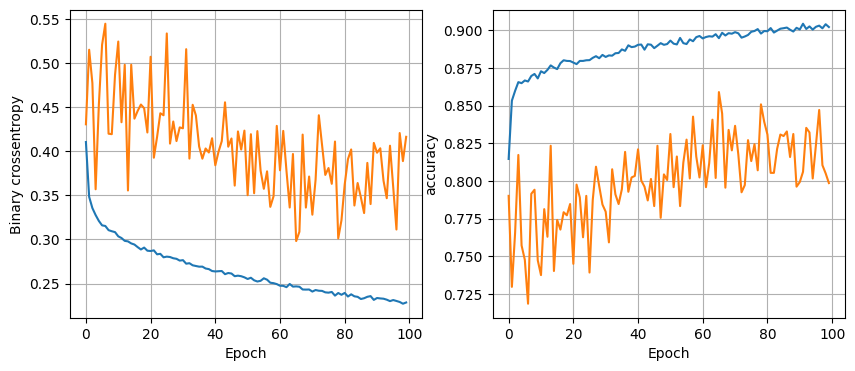

119/119 [==============================] - 0s 563us/step - loss: 0.3789 - accuracy: 0.8601
32 nodes , dropout 0 , learning rate 0.005 , batch size 128


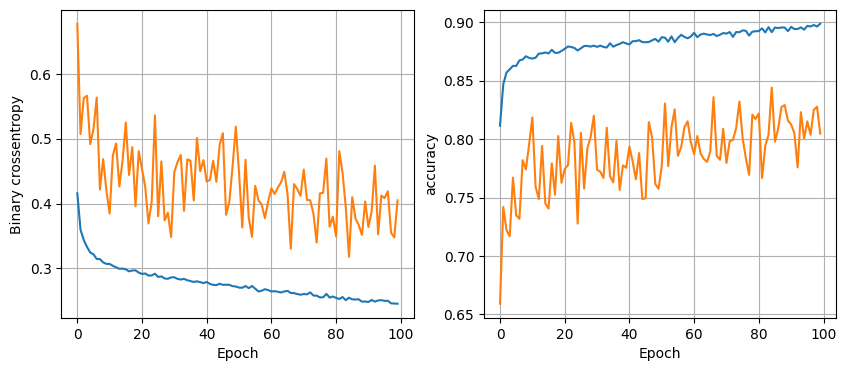

119/119 [==============================] - 0s 521us/step - loss: 0.3437 - accuracy: 0.8683
32 nodes , dropout 0 , learning rate 0.001 , batch size 32


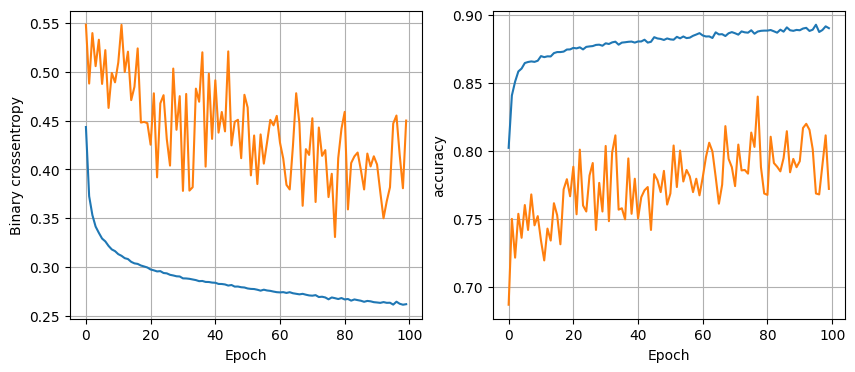

119/119 [==============================] - 0s 591us/step - loss: 0.3189 - accuracy: 0.8733
32 nodes , dropout 0 , learning rate 0.001 , batch size 64


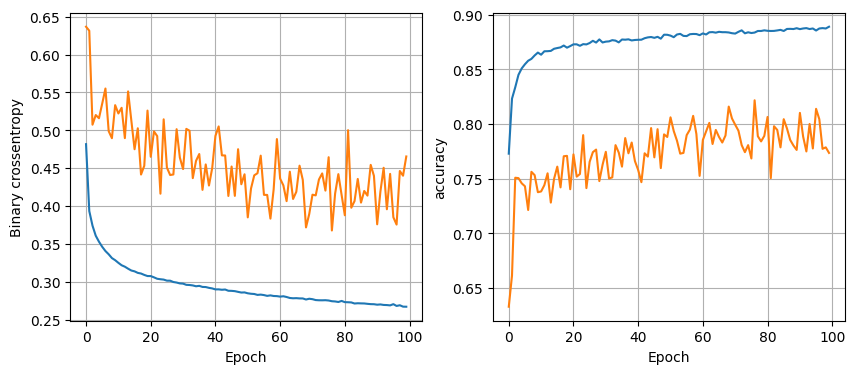

119/119 [==============================] - 0s 588us/step - loss: 0.3130 - accuracy: 0.8717
32 nodes , dropout 0 , learning rate 0.001 , batch size 128


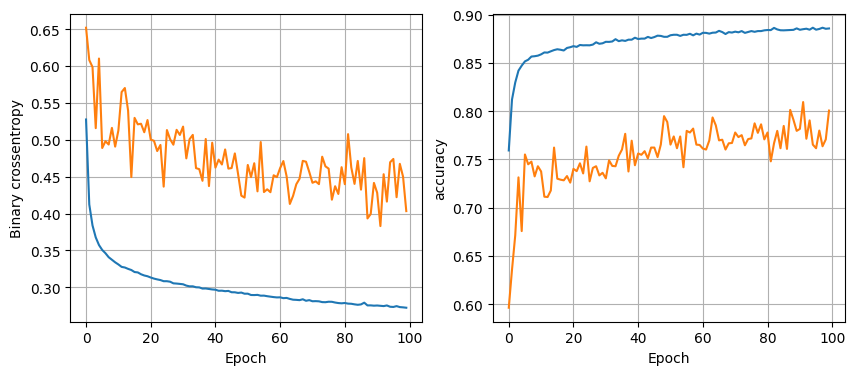

119/119 [==============================] - 0s 580us/step - loss: 0.3145 - accuracy: 0.8704
32 nodes , dropout 0.2 , learning rate 0.01 , batch size 32


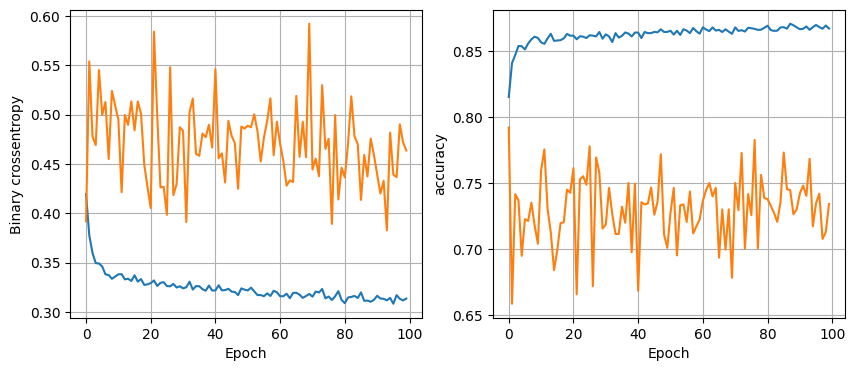

119/119 [==============================] - 0s 548us/step - loss: 0.3214 - accuracy: 0.8662
32 nodes , dropout 0.2 , learning rate 0.01 , batch size 64


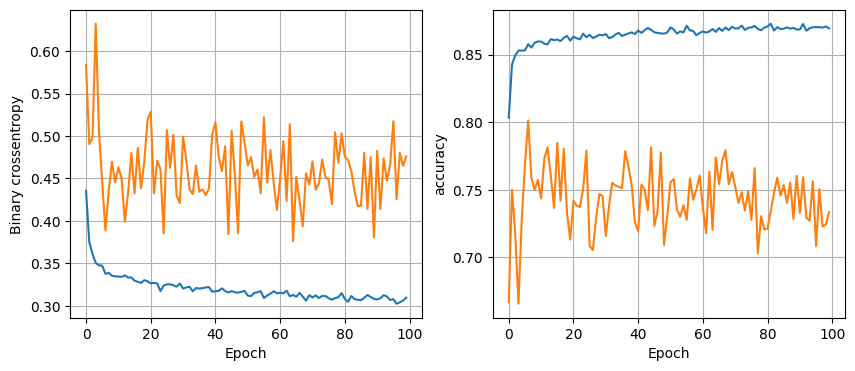

119/119 [==============================] - 0s 556us/step - loss: 0.3146 - accuracy: 0.8725
32 nodes , dropout 0.2 , learning rate 0.01 , batch size 128


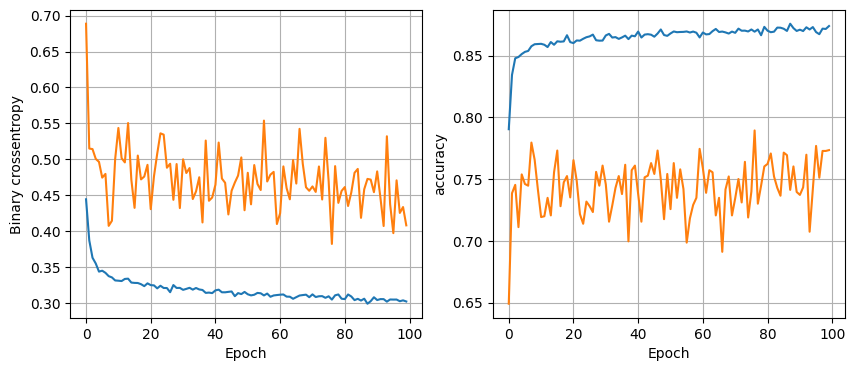

119/119 [==============================] - 0s 586us/step - loss: 0.3060 - accuracy: 0.8767
32 nodes , dropout 0.2 , learning rate 0.005 , batch size 32


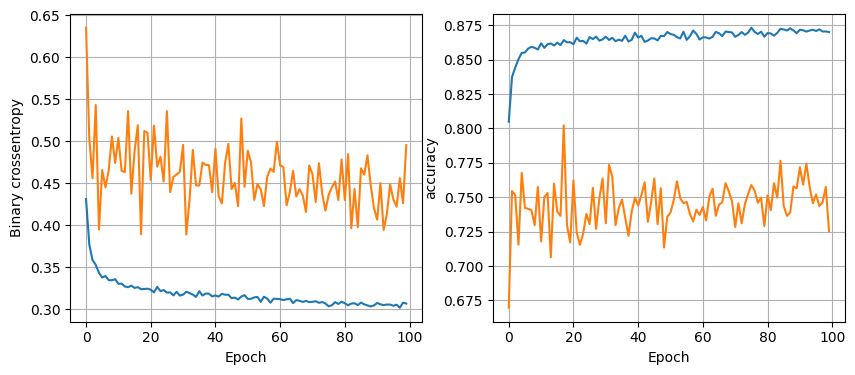

119/119 [==============================] - 0s 518us/step - loss: 0.3146 - accuracy: 0.8683
32 nodes , dropout 0.2 , learning rate 0.005 , batch size 64


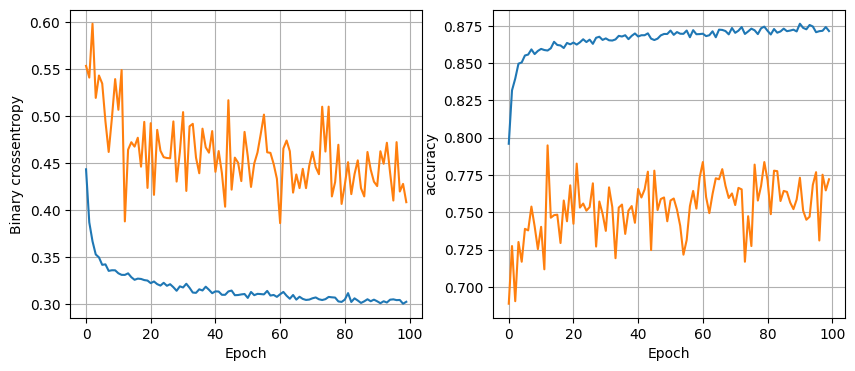

119/119 [==============================] - 0s 566us/step - loss: 0.3093 - accuracy: 0.8728
32 nodes , dropout 0.2 , learning rate 0.005 , batch size 128


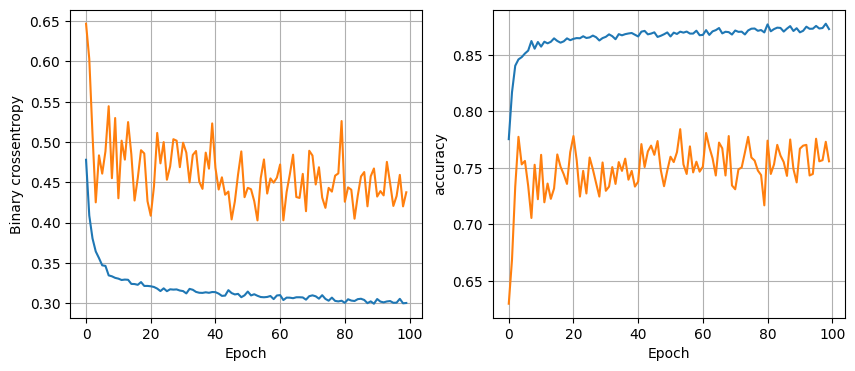

119/119 [==============================] - 0s 558us/step - loss: 0.3137 - accuracy: 0.8730
32 nodes , dropout 0.2 , learning rate 0.001 , batch size 32


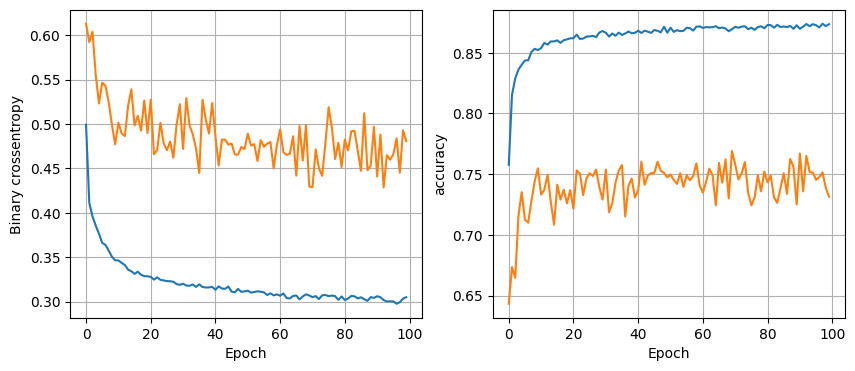

119/119 [==============================] - 0s 572us/step - loss: 0.3098 - accuracy: 0.8693
32 nodes , dropout 0.2 , learning rate 0.001 , batch size 64


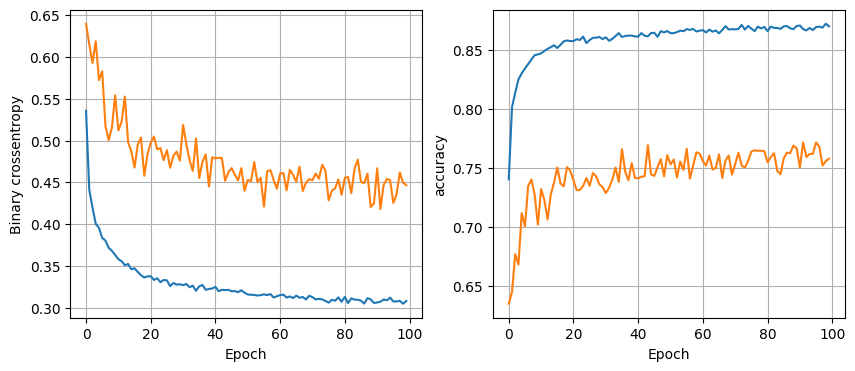

119/119 [==============================] - 0s 614us/step - loss: 0.3082 - accuracy: 0.8715
32 nodes , dropout 0.2 , learning rate 0.001 , batch size 128


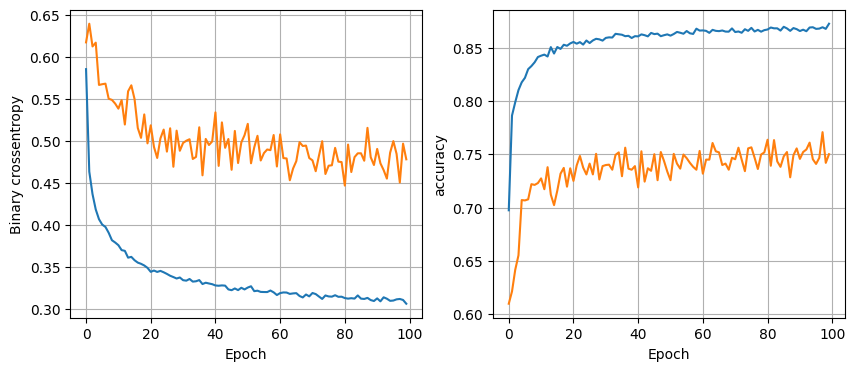

119/119 [==============================] - 0s 492us/step - loss: 0.3089 - accuracy: 0.8738
64 nodes , dropout 0 , learning rate 0.01 , batch size 32


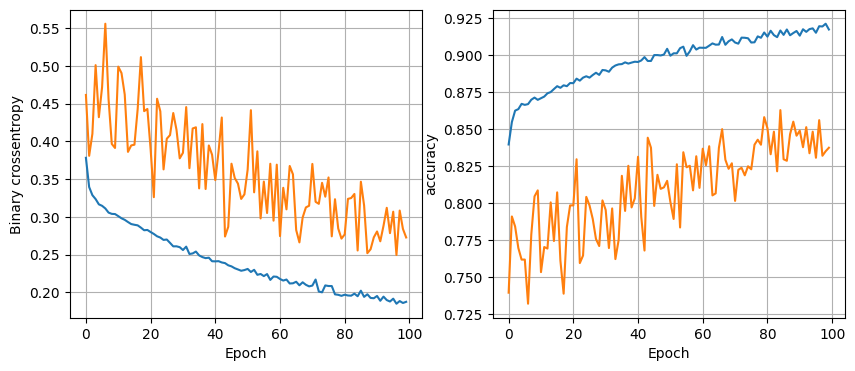

119/119 [==============================] - 0s 582us/step - loss: 0.5467 - accuracy: 0.8546
64 nodes , dropout 0 , learning rate 0.01 , batch size 64


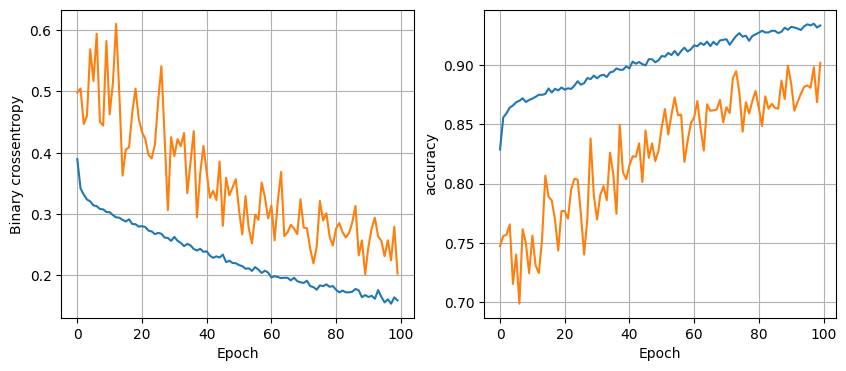

119/119 [==============================] - 0s 597us/step - loss: 0.5727 - accuracy: 0.8457
64 nodes , dropout 0 , learning rate 0.01 , batch size 128


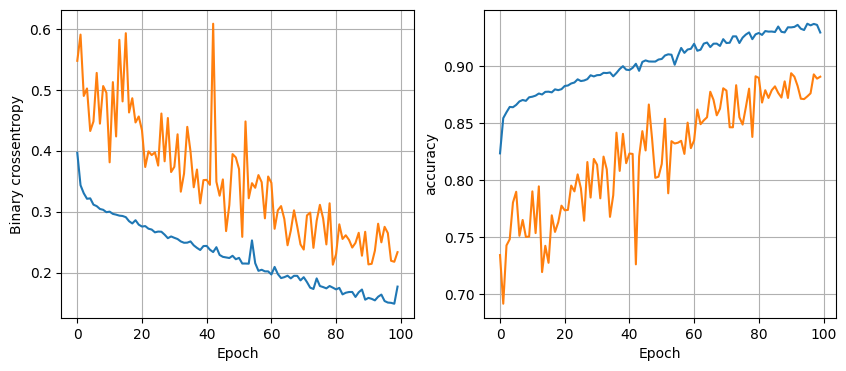

119/119 [==============================] - 0s 609us/step - loss: 0.5614 - accuracy: 0.8588
64 nodes , dropout 0 , learning rate 0.005 , batch size 32


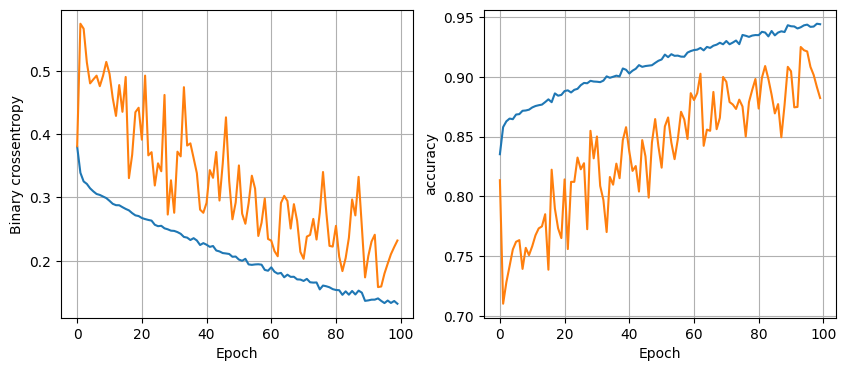

119/119 [==============================] - 0s 914us/step - loss: 0.6453 - accuracy: 0.8565
64 nodes , dropout 0 , learning rate 0.005 , batch size 64


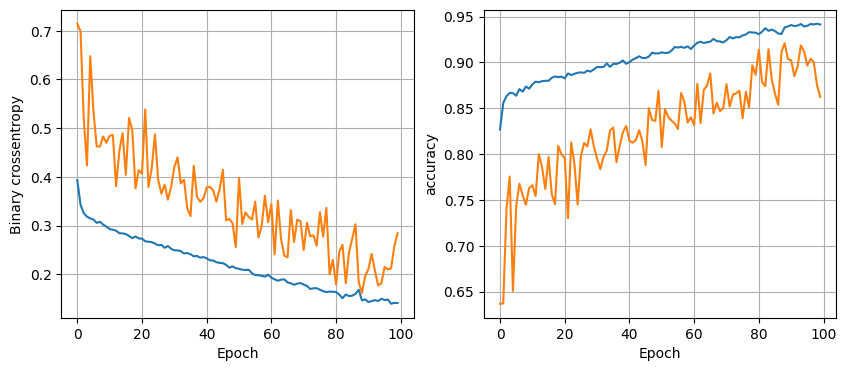

119/119 [==============================] - 0s 540us/step - loss: 0.5854 - accuracy: 0.8575
64 nodes , dropout 0 , learning rate 0.005 , batch size 128


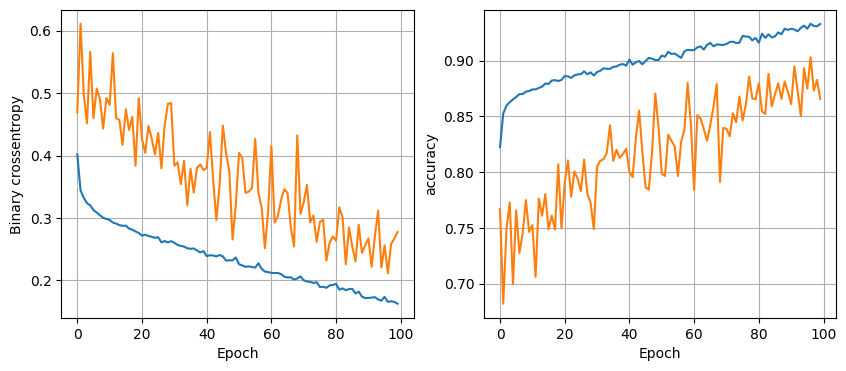

119/119 [==============================] - 0s 557us/step - loss: 0.5034 - accuracy: 0.8546
64 nodes , dropout 0 , learning rate 0.001 , batch size 32


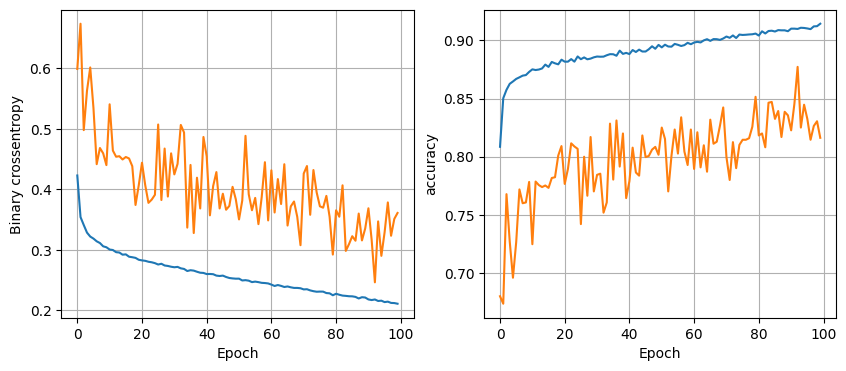

119/119 [==============================] - 0s 470us/step - loss: 0.3541 - accuracy: 0.8672
64 nodes , dropout 0 , learning rate 0.001 , batch size 64


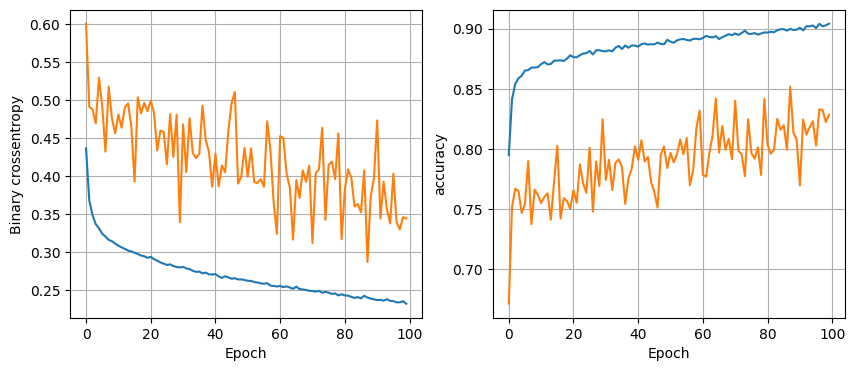

119/119 [==============================] - 0s 564us/step - loss: 0.3317 - accuracy: 0.8688
64 nodes , dropout 0 , learning rate 0.001 , batch size 128


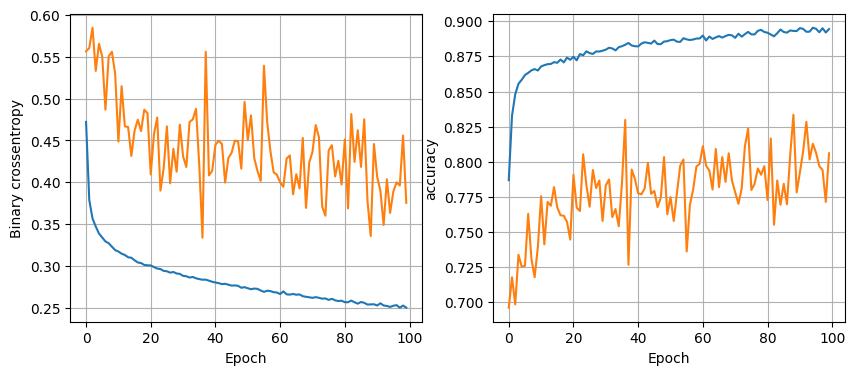

119/119 [==============================] - 0s 601us/step - loss: 0.3262 - accuracy: 0.8693
64 nodes , dropout 0.2 , learning rate 0.01 , batch size 32


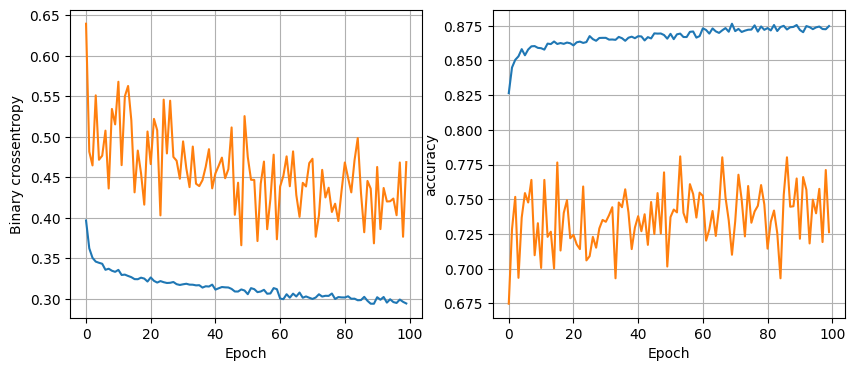

119/119 [==============================] - 0s 560us/step - loss: 0.3340 - accuracy: 0.8633
64 nodes , dropout 0.2 , learning rate 0.01 , batch size 64


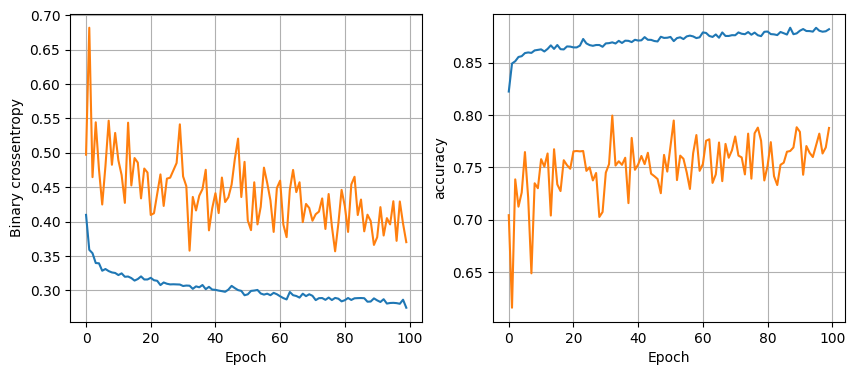

119/119 [==============================] - 0s 590us/step - loss: 0.3219 - accuracy: 0.8751
64 nodes , dropout 0.2 , learning rate 0.01 , batch size 128


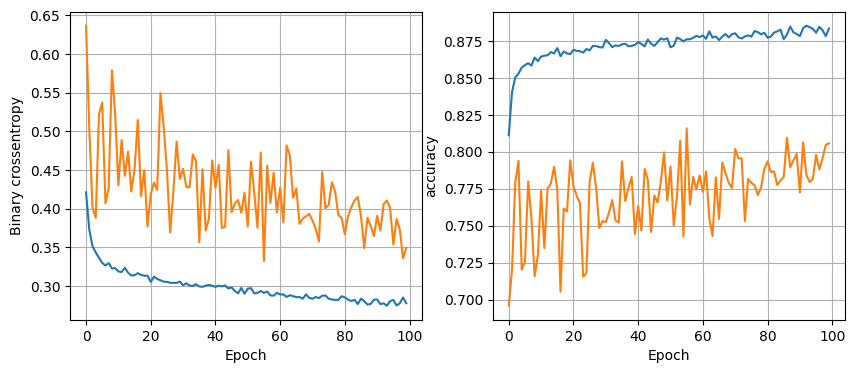

119/119 [==============================] - 0s 583us/step - loss: 0.3227 - accuracy: 0.8762
64 nodes , dropout 0.2 , learning rate 0.005 , batch size 32


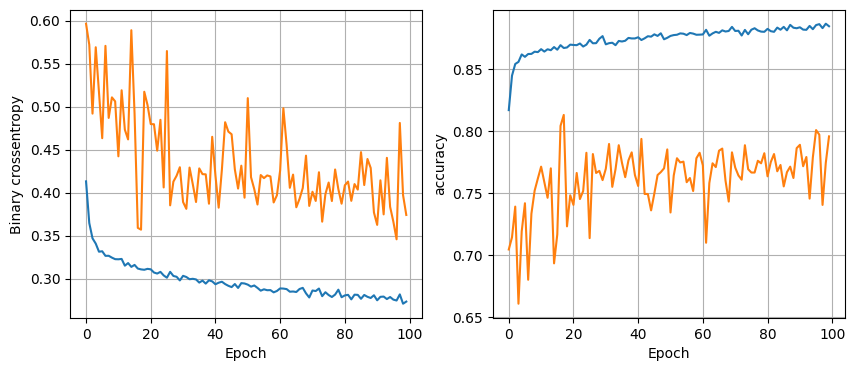

119/119 [==============================] - 0s 568us/step - loss: 0.3190 - accuracy: 0.8730
64 nodes , dropout 0.2 , learning rate 0.005 , batch size 64


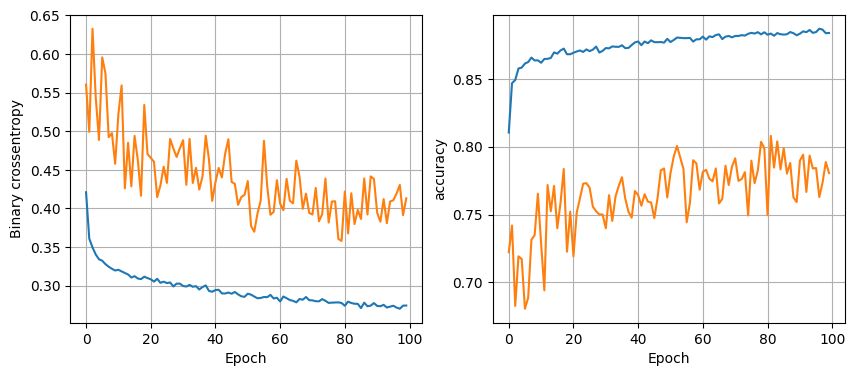

119/119 [==============================] - 0s 595us/step - loss: 0.3202 - accuracy: 0.8720
64 nodes , dropout 0.2 , learning rate 0.005 , batch size 128


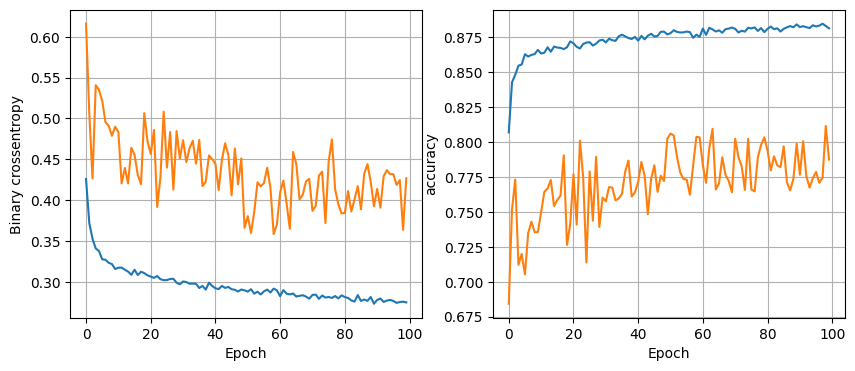

119/119 [==============================] - 0s 596us/step - loss: 0.3166 - accuracy: 0.8762
64 nodes , dropout 0.2 , learning rate 0.001 , batch size 32


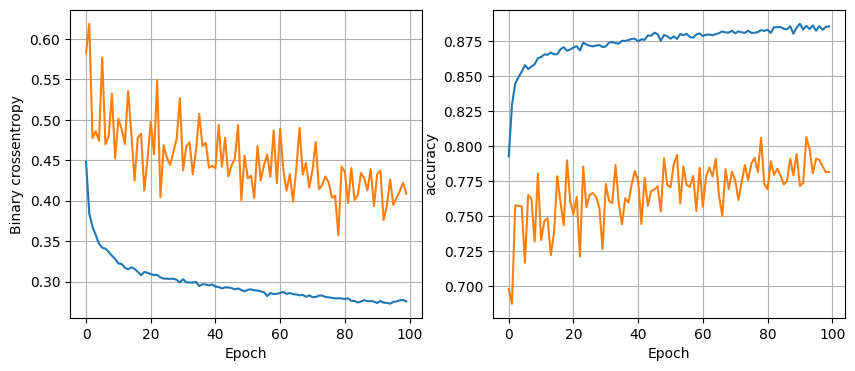

119/119 [==============================] - 0s 570us/step - loss: 0.3022 - accuracy: 0.8785
64 nodes , dropout 0.2 , learning rate 0.001 , batch size 64


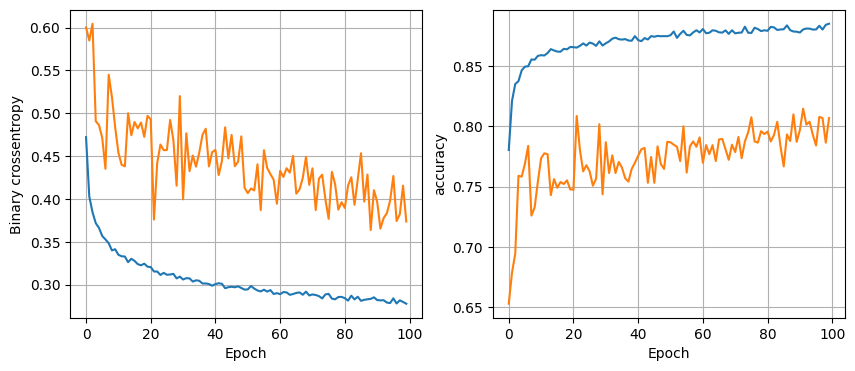

119/119 [==============================] - 0s 570us/step - loss: 0.3077 - accuracy: 0.8725
64 nodes , dropout 0.2 , learning rate 0.001 , batch size 128


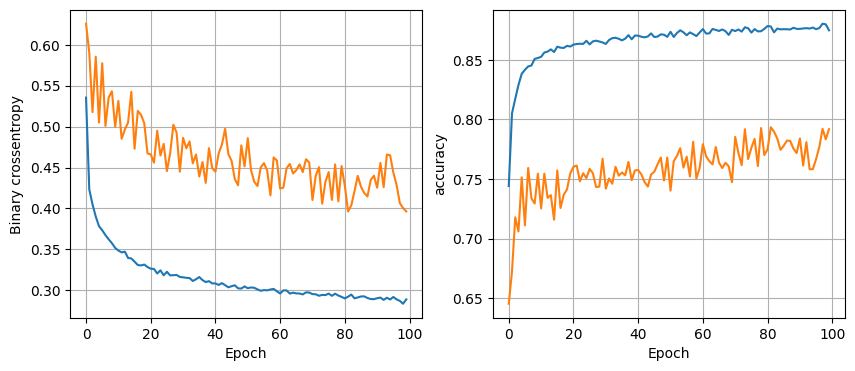

119/119 [==============================] - 0s 591us/step - loss: 0.3083 - accuracy: 0.8759


In [58]:
least_val_loss = float('inf')
least_loss_model = None
epochs =100

# Defining nodes
for num_nodes in [16,32,64]:
  
# Defining dropout for the nodes
    for dropout_prob in [0,0.2]:
        
# Defining Learning Rate for the model/optimizer        
        for lr in [0.01,0.005,0.001]:

# Defining Batch Size for the training
            for batch_size in [32,64,128]:
                
                print(f"{num_nodes} nodes , dropout {dropout_prob} , learning rate {lr} , batch size {batch_size}")
                model,history = train_model(X_train , y_train , num_nodes , dropout_prob , lr , batch_size , epochs)

                plot_history(history)
                val_loss = model.evaluate(X_valid,y_valid)[0]
                val_accuracy = model.evaluate(X_valid,y_valid)[1]
                if val_loss < least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model


Above are the loss and accuracy iterating for
1. nodes[16,32,64] 
2. dropout[0,0.2] 
3. for lr[0.01,0.005,0.001]
4. batch size[32,64,128]
for every 52 combinations

In [68]:
print("Least Validation Loss : {}".format(least_val_loss))
print("Validation accuracy of the model : {}".format(val_accuracy))
print(least_loss_model.summary())

Least Validation Loss : 0.3022401034832001
Validation accuracy of the model : 0.8759200572967529
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 64)                704       
                                                                 
 dropout_106 (Dropout)       (None, 64)                0         
                                                                 
 dense_160 (Dense)           (None, 64)                4160      
                                                                 
 dropout_107 (Dropout)       (None, 64)                0         
                                                                 
 dense_161 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
____________________